# Time Series Forecasting for Energy Consumption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as sc
import statistics as st
import plotly.express as px
from datetime import date

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('D:\Paractical data scientist\energy conce\PJME_hourly.csv')
# df = pd.DataFrame(df, columns=['Datetime', 'PJME_MW'])
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')

In [ ]:
df.plot(style='.',figsize=(15, 5),color=color_pal[0],title='PJME Energy Use in MW')
plt.show()

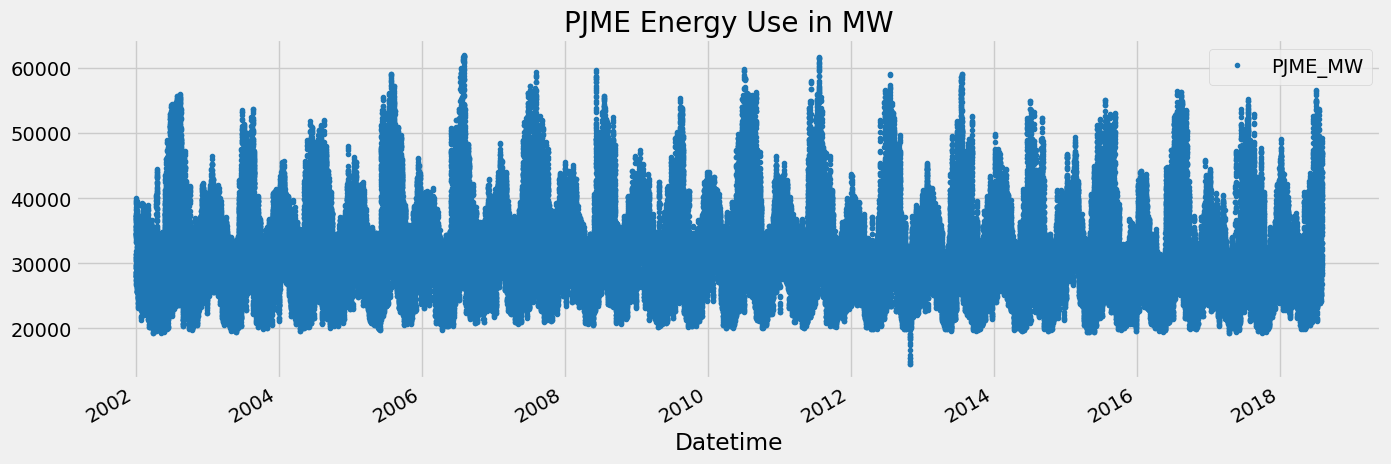

In [ ]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

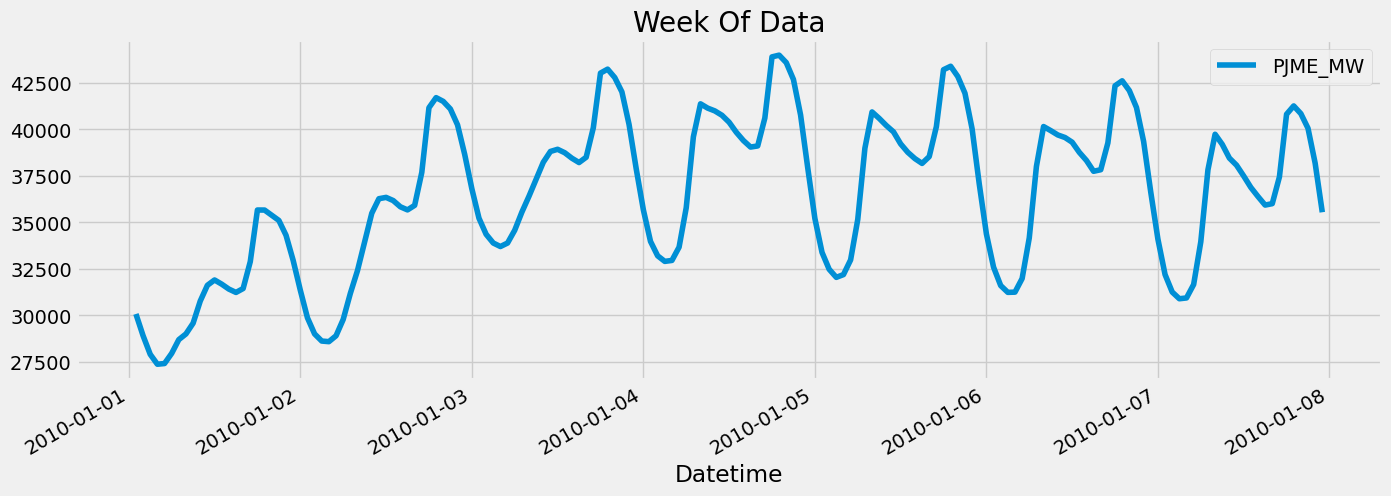

# Feature Creation

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [ ]:
#=========================== month distribution
monthly_sum = df.groupby('month')['PJME_MW'].sum().reset_index()
monthly_sum.columns = ['month', 'count']
fig = px.bar(monthly_sum, x='month', y="count", orientation='v', title="MW month of the year", width=900, height=600)
fig.show()
#=========================== 
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()

In [ ]:
#=========================== hourly distribution
monthly_sum = df.groupby('hour')['PJME_MW'].sum().reset_index()
monthly_sum.columns = ['hour', 'count']
fig = px.bar(monthly_sum, x='hour', y="count", orientation='v', title="MW hourly of the year", width=900, height=600)
fig.show()
#=========================== 
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

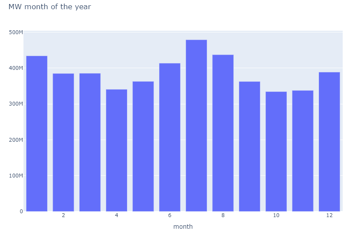 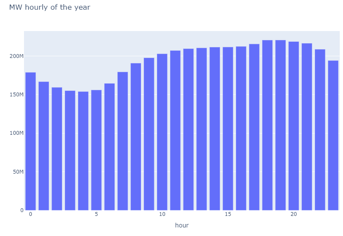

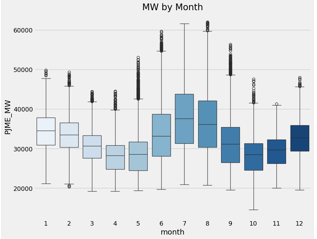 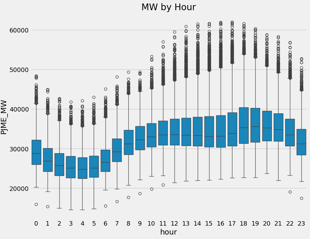

In [ ]:
#=========================== yearly distribution
year = df.groupby('year')['PJME_MW'].sum().reset_index()
year.columns = ['year', 'count']
fig = px.bar(year, x='year', y="count", orientation='v', title="MW of the year", width=900, height=600)
fig.show()
#===========================
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='year', y='PJME_MW', palette='Blues')
ax.set_title('MW by year')
plt.show()

In [ ]:
#=========================== dayofweek distribution
dayofweek = df.groupby('dayofweek')['PJME_MW'].sum().reset_index()
dayofweek.columns = ['dayofweek', 'count']
fig = px.bar(dayofweek, x='dayofweek', y="count", orientation='v', title="MW ay of the week", width=900, height=600)
fig.show()
#===========================
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofweek', y='PJME_MW', palette='Blues')
ax.set_title('MW by dayofweek')
plt.show()

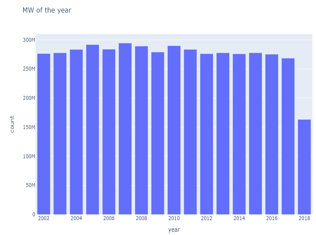  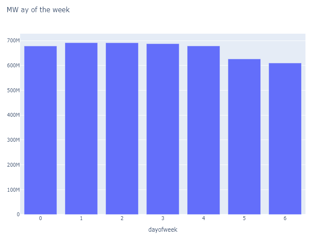

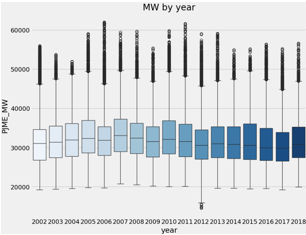  

In [ ]:
#=========================== weekly distribution of year
weekofyear = df.groupby('weekofyear')['PJME_MW'].sum().reset_index()
weekofyear.columns = ['weekofyear', 'count']
fig = px.bar(weekofyear, x='weekofyear', y="count", orientation='v', title="MW weekly of the year", width=900, height=600)
fig.show()

In [ ]:
#=========================== day distribution of month
dayofmonth = df.groupby('dayofmonth')['PJME_MW'].sum().reset_index()
dayofmonth.columns = ['dayofmonth', 'count']
fig = px.bar(dayofmonth, x='dayofmonth', y="count", orientation='v', title="MW dayofmonth of the year", width=900, height=600)
fig.show()

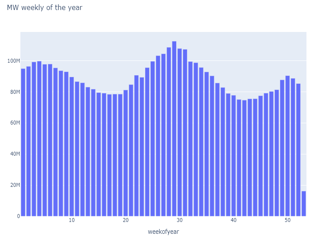  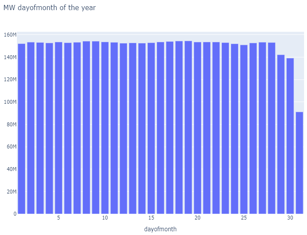

In [ ]:
#=========================== day distribution of year
dayofyear = df.groupby('dayofyear')['PJME_MW'].sum().reset_index()
dayofyear.columns = ['dayofyear', 'count']
fig = px.bar(dayofyear, x='dayofyear', y="count", orientation='v', title="MW dayofyear of the year", width=900, height=600)
fig.show()

In [ ]:
#=========================== quarter distribution of year
quarter = df.groupby('quarter')['PJME_MW'].sum().reset_index()
quarter.columns = ['quarter', 'count']
fig = px.bar(quarter, x='quarter', y="count", orientation='v', title="MW quarter of the year", width=900, height=600)
fig.show()
#===========================
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='PJME_MW', palette='Blues')
ax.set_title('MW by quarter')
plt.show()

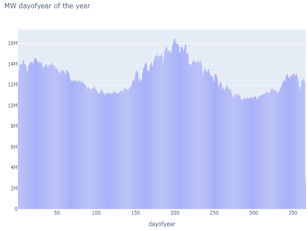  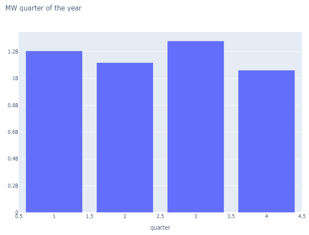

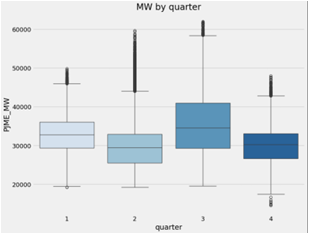

In [ ]:
# Ensuite, vous pouvez utiliser la fonction loc normalement
df['PJME_MW'].resample('M').mean().plot(figsize=(9, 6), title='Monthly Mean of MW')
plt.show()

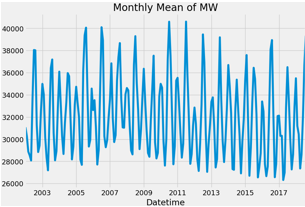

In [ ]:
# Ensuite, vous pouvez utiliser la fonction loc normalement
df.loc['2005','PJME_MW'].resample('W').mean().plot(figsize=(9, 6), title='Monthly Mean of MW')
plt.show()

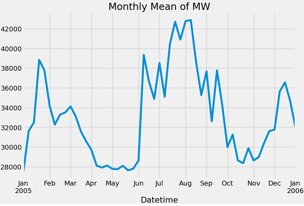

In [ ]:
# =================================== Aggregate
m = df['PJME_MW'].resample('W').agg(['mean', 'std', 'min', 'max'])
plt.figure(figsize=(12, 8))
m['mean'].plot(figsize=(9, 6),label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')
plt.legend()
plt.show()

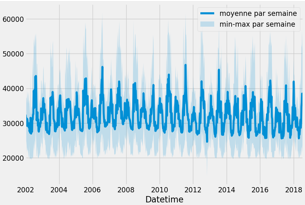

In [ ]:
# ==================================== Moving Average et EWM
plt.figure(figsize=(12, 8))
df['PJME_MW']['2004-08'].plot()
df['PJME_MW']['2004-08'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
df['PJME_MW']['2004-08'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)
df['PJME_MW']['2004-08'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

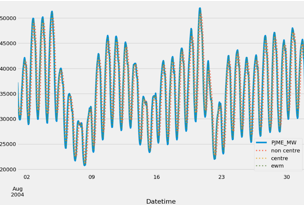

In [ ]:
df['hour'].loc['2002-08'].plot(figsize=(9, 6))
plt.show()

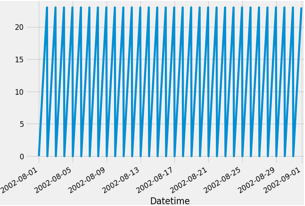

In [ ]:
# =============================
df['N_Time'] = pd.to_numeric(df['hour'])
df['N_Time'].plot(figsize=(9, 6))
df.resample('M').count().plot(y='N_Time', figsize=(9, 6))
plt.show()

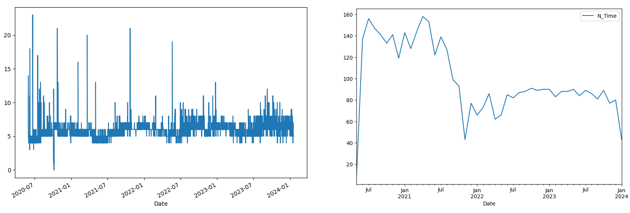

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_2304\3086422801.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<Axes: xlabel='Date'>

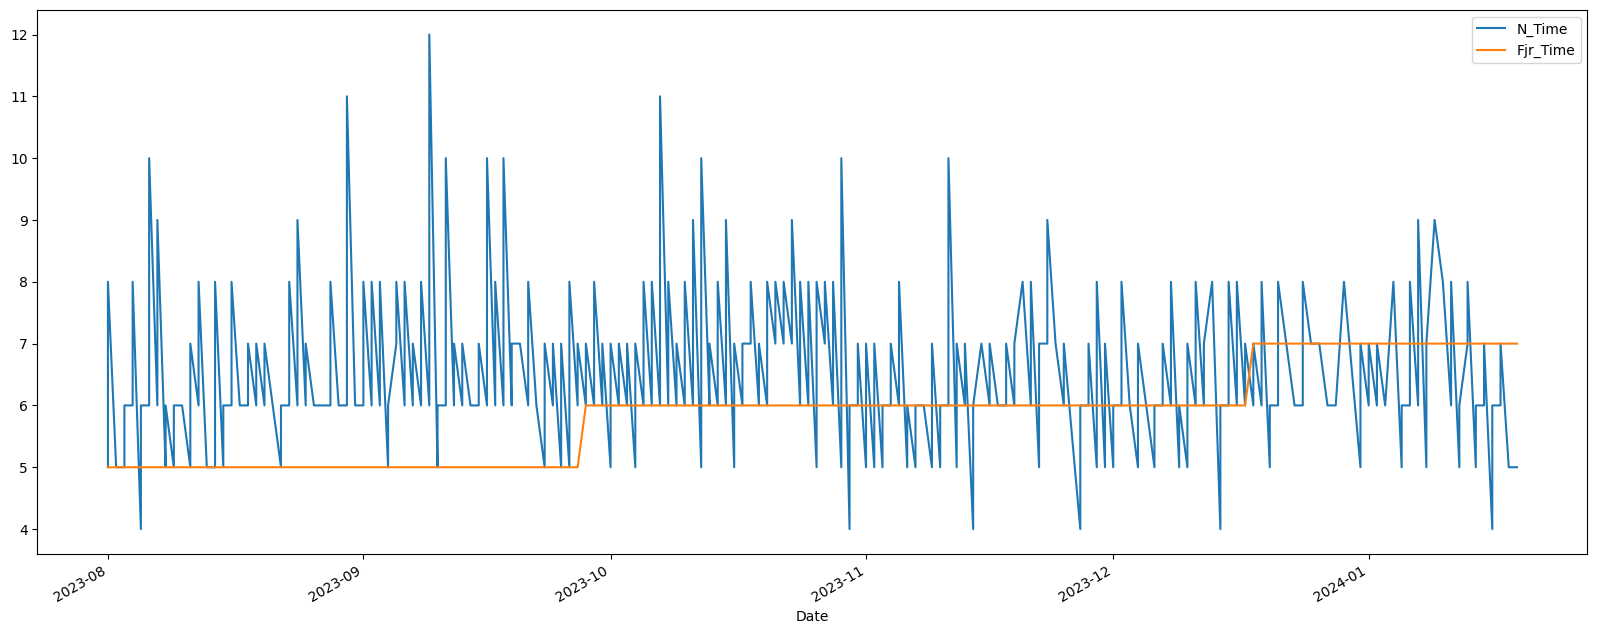

In [73]:
# ==================================== Comparaison de 2 série temporelles
Fjr = pd.read_csv('D:\Paractical data scientist\Time seris\Real.csv', delimiter=';', parse_dates=['Date'], dayfirst=True)
Fjr.set_index('Date', inplace=True)
Fjr['Fjr_hour'] = pd.to_datetime(Fjr['Time2']).dt.hour
Fjr['Fjr_Time'] = pd.to_numeric(Fjr['Fjr_hour'])

data = pd.merge(df, Fjr, on='Date', how='inner', suffixes=('_real', '_fjr'))
data.head()

# data[['N_Time', 'Fjr_Time']].plot(subplots=True, figsize=(12, 8))
data[['N_Time', 'Fjr_Time']].plot( figsize=(20, 8))

Text(0, 0.5, 'Count')

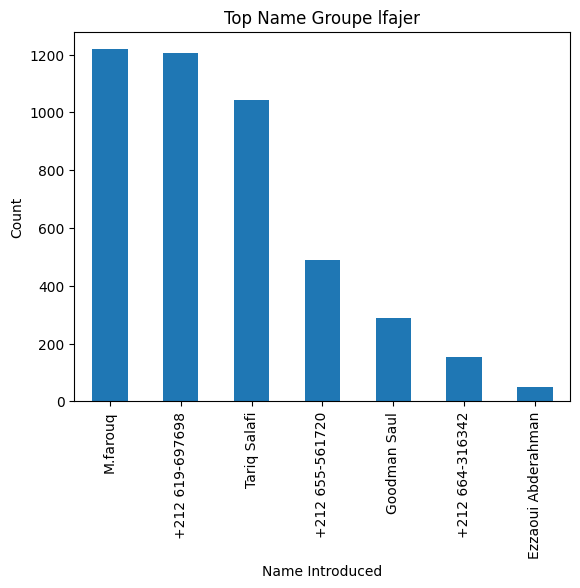

In [74]:
ax = df['Name'].value_counts().head(10).plot(kind='bar', title='Top Name Groupe lfajer')
ax.set_xlabel('Name Introduced')
ax.set_ylabel('Count')

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_18664\4174620482.py:44: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_18664\4174620482.py:86: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_18664\4174620482.py:128: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<Axes: xlabel='Date'>

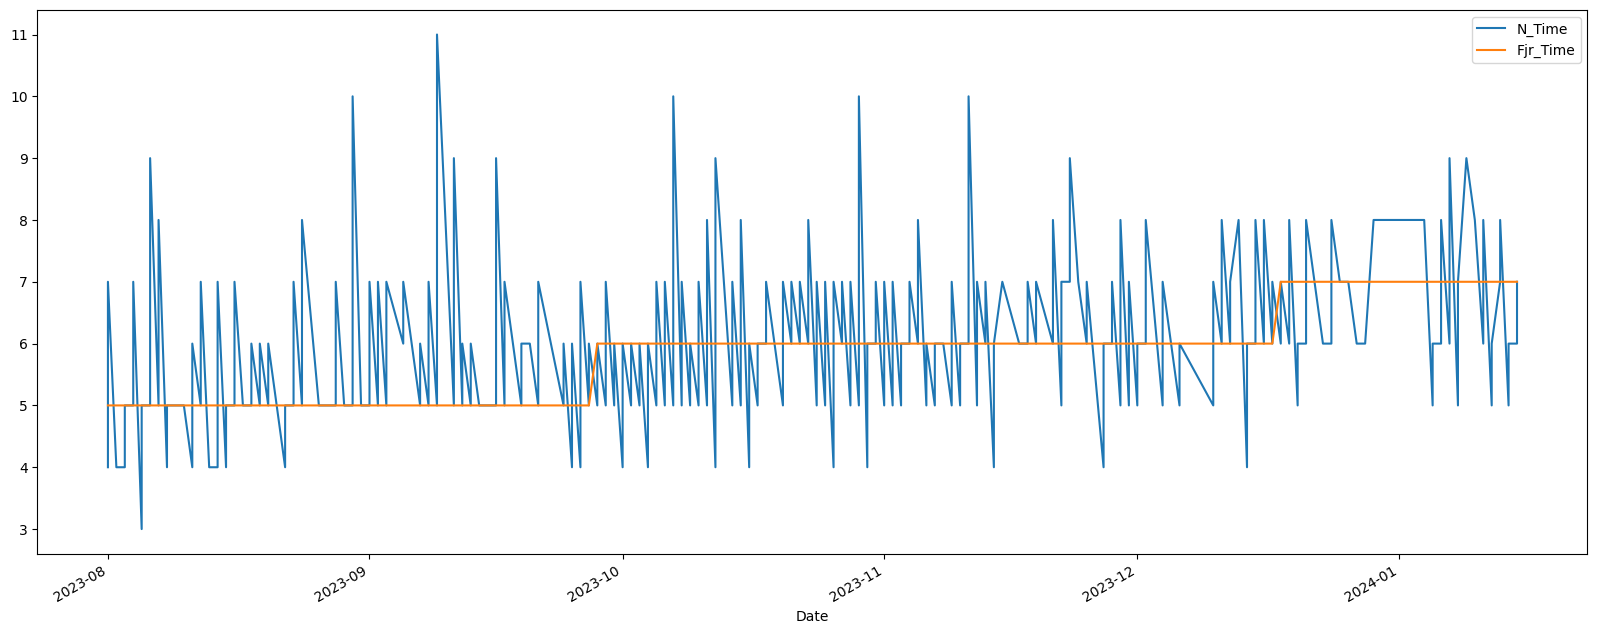

In [144]:
# from pushbullet import Pushbullet # pip install pushbullet.py
# # API KEY PushBullet (https://www.pushbullet.com/)
# API_KEY = "YOUR_API_KEY"
# # Get Link to Chatfile from Pushbullet
# pb = Pushbullet(API_KEY)
# pushes = pb.get_pushes()
# latest = pushes[0]

# # Download Chatfile
# url = latest['file_url']
file_path = "D:\Paractical data scientist\Time seris\chat.txt"
# urllib.request.urlretrieve(url, file_path)

# read file by lines
with open(file_path, mode='r', encoding="utf8") as f:
    data = f.readlines()

# FOUND ON GITHUB: https://gist.github.com/kwcooper/a21ba58272d3cdf26310cc02ee4b168f
# parse text, create list of lists structure & remove first whatsapp info message
dataset = data[1:]
cleaned_data = []
for line in dataset:
    # Check, whether it is a new line or not
    # If the following characters are in the line -> assumption it is NOT a new line
    if '/' in line and ':' in line and ',' in line and '-' in line:
        # grab the info and cut it out
        date = line.split(",")[0]
        line2 = line[len(date):]
        time = line2.split("-")[0][2:]
        line3 = line2[len(time):]
        name = line3.split(":")[0][4:]
        line4 = line3[len(name):]
        message = line4[6:-1] # strip newline charactor
        cleaned_data.append([date, time, name, message])

    # else, assumption -> new line. Append new line to previous 'message'
    else:
        new = cleaned_data[-1][-1] + " " + line
        cleaned_data[-1][-1] = new

# Create the DataFrame
df = pd.DataFrame(cleaned_data, columns=['Date', 'Time', 'Name', 'Message'])
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# df['Time'] = pd.to_datetime(df['Time'])
# Set 'Date' column as the index
df.set_index('Date', inplace=True)
# ====================
rest_types_lessthan1000 = ['ðŸ‘\x8d', 'ðŸ‘\x8dðŸ\x8f»']
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'OK'
    else:
        return 'NOK'
df['Message'] = df['Message'].apply(handle_rest_type)
df['Message'].value_counts()

df.drop(df[df["Message"] == "NOK"].index, inplace=True)
# print(df)
# print(f'{"Message" :-<40} {df["Message"].unique()}')
# ============================
# df['Time'].plot(figsize=(9, 6))
# plt.show()
# ============================
# print(df.index)
# df.loc['2023-07-04':'2023-07-08','Time'].plot()
# =============================
# df['Time'] = pd.to_datetime(df['Time']).dt.hour
# median_time = df['Time'].median()
# print(f'Median Time for Time: {median_time}')
#=========================== month distribution
# ds = df.copy()
# ds['month'] = pd.to_datetime(df['Date']).dt.month
# ds = ds['month'].value_counts().reset_index()
# ds.columns = ['month', 'count']
# fig = px.bar(ds, x='month', y="count", orientation='v', title="Fajr month of the year", width=900, height=600)
# fig.show()
#=========================== Time distribution
# ds = df.copy()
# ds['hour'] = pd.to_datetime(df['Time']).dt.hour
# ds = ds['hour'].value_counts().reset_index()
# ds.columns = ['hour', 'count']
# fig = px.bar(ds, x='hour', y='count', orientation='v', title='Distribution Across Hours', width=900, height=600)
# fig.show()
#===========================
df['hour'] = pd.to_datetime(df['Time']).dt.hour
# df['hour'].plot()
# =============================
df['N_Time'] = pd.to_numeric(df['hour'])
# df['N_Time'].plot(figsize=(9, 6))
# df.resample('M').count().plot(y='N_Time', figsize=(9, 6))
# plt.show()
# =============================== Mean of the month & the week
# plt.figure(figsize=(12, 8))
# df['N_Time'].plot()
# df['N_Time'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
# df['N_Time'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
# plt.legend()
# plt.show()
# =============================== Mean of the month
# df['N_Time'].loc['2023'].resample('M').mean().plot(figsize=(9, 6), title='Monthly Mean of Time in 2023')
# df['N_Time'].resample('M').mean().plot(figsize=(9, 6), title='Monthly Mean of Time')
# plt.show()
# =================================
# df['N_Time'].resample('M').std().plot(figsize=(9, 6), title='Monthly std of Time')
# plt.show()
# =================================== Aggregate
# m = df['N_Time'].resample('W').agg(['mean', 'std', 'min', 'max'])
# plt.figure(figsize=(12, 8))
# m['mean']['2023'].plot(figsize=(9, 6),label='moyenne par semaine')
# plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')
# plt.legend()
# plt.show()
# ===================================
# df['N_Time'].resample('W').agg(['mean', 'std', 'min', 'max']).plot(figsize=(9, 6))
# plt.show()
# ==================================== Moving Average et EWM
# plt.figure(figsize=(12, 8))
# df['N_Time']['2023-08'].plot()
# df['N_Time']['2023-08'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
# df['N_Time']['2023-08'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)
# df['N_Time']['2023-08'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.8)
# plt.legend()
# plt.show()
# ==================================== Comparaison de 2 série temporelles
Fjr = pd.read_csv('D:\Paractical data scientist\Time seris\Real.csv', delimiter=';', parse_dates=['Date'], dayfirst=True)
Fjr.set_index('Date', inplace=True)
Fjr['Fjr_hour'] = pd.to_datetime(Fjr['Time2']).dt.hour
Fjr['Fjr_Time'] = pd.to_numeric(Fjr['Fjr_hour'])

data = pd.merge(df, Fjr, on='Date', how='inner', suffixes=('_real', '_fjr'))
data.head()

# data[['N_Time', 'Fjr_Time']].plot(subplots=True, figsize=(12, 8))
data[['N_Time', 'Fjr_Time']].plot( figsize=(20, 8))

Text(0, 0.5, 'Count')

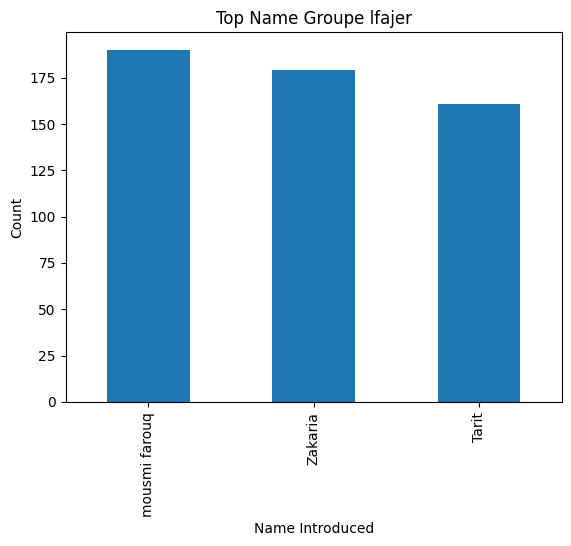

In [35]:
ax = df['Name'].value_counts().head(10).plot(kind='bar', title='Top Name Groupe lfajer')
ax.set_xlabel('Name Introduced')
ax.set_ylabel('Count')

In [ ]:
############################## Age distribution (use it only for time column)
import plotly.express as px
from datetime import date
df['Date'] = pd.to_datetime(df['Date'])
#=========================== age distribution
def calculate_age(born): 
    today = date.today() 
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['Date'].apply(lambda row : calculate_age(row))
fig = px.histogram(df, "age", nbins=25, title='Age distribution', width=800)
fig.show()
#=========================== month distribution
WIDTH=800
ds = df.copy()
ds['month'] = pd.to_datetime(df['Date']).dt.month
ds = ds['month'].value_counts().reset_index()
ds.columns = ['month', 'count']
fig = px.bar(ds, x='month', y="count", orientation='v', title="Rains month of the year", width=WIDTH, height=600)
fig.show()
#=========================== month vs target classification
plt.figure(figsize = (16,10))
ax = sns.countplot(data=df, x="b_month",hue=df['column_y'])  
plt.xticks(rotation=90)
plt.show  


In [ ]:
file_path = "D:\Paractical data scientist\Time seris\chat.txt"
# urllib.request.urlretrieve(url, file_path)

# read file by lines
with open(file_path, mode='r', encoding="utf8") as f:
    data = f.readlines()

dataset = data[1:]
cleaned_data = []
for line in dataset:
    # Check, whether it is a new line or not
    # If the following characters are in the line -> assumption it is NOT a new line
    if '/' in line and ':' in line and ',' in line and '-' in line:
        # grab the info and cut it out
        date = line.split(",")[0]
        line2 = line[len(date):]
        time = line2.split("-")[0][2:]
        line3 = line2[len(time):]
        name = line3.split(":")[0][4:]
        line4 = line3[len(name):]
        message = line4[6:-1] # strip newline charactor
        cleaned_data.append([date, time, name, message])

    # else, assumption -> new line. Append new line to previous 'message'
    else:
        new = cleaned_data[-1][-1] + " " + line
        cleaned_data[-1][-1] = new

# Create the DataFrame
df = pd.DataFrame(cleaned_data, columns=['Date', 'Time', 'Name', 'Message'])
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])
# ====================
rest_types_lessthan1000 = ['👍🏻', '👍🏻👍🏻','👍','🙏','🙋🏼‍♂️','🙋🏻‍♂️','🙋🏽‍♂️','🤲','🤵','✌️','💁‍♂️','💪🏻','✋','😴','😘','🙈','🤝🏻','😁','🙏🏻🙏🏻','🙋🏻‍♂️😢','✋🏽','✋🏼','☝️','✌🏽','🐫','🤲🏼🤲🏼🤲🏼🤲🏼','✋🏽✋🏽✋🏽','✋🏽✋🏽👍🏻','👍🏻🤝🏻','👳🏻‍♀️','👋','😃','😁😁😁','👏','🥰','🤔🤨','🥳']
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'OK'
    else:
        return 'NOK'
df['Message'] = df['Message'].apply(handle_rest_type)
df['Message'].value_counts()

df.drop(df[df["Message"] == "NOK"].index, inplace=True)
# print(f'{"Message" :-<40} {df["Message"].unique()}')
data = df.copy()
ds = df.copy()
# # ============================
# Set 'Date' column as the index
df.set_index('Date', inplace=True)
df['Time'].plot(figsize=(20, 6))
plt.show()
# # ============================
# df['Time'] = pd.to_datetime(df['Time']).dt.hour
# median_time = df['Time'].median()
# print(f'Median Time for Time: {median_time}')